## Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py as h5
import sys
from scipy.stats import binned_statistic
from scipy.stats.mstats import theilslopes
from importlib import reload
from pathlib import Path

sys.path.append('/reg/neh/home4/espov/python/datastorage/')
import datastorage

import ana_fun as ana
import bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rc('font', size=20)

Loading BokehJS ...

## Load data

In [13]:
data = datastorage.read('vesp_run60_anaMPI.h5')
t0 = 51.75

mask = np.logical_and(~np.isnan(data.sig), ~np.isnan(data.I0))

dl = data.dl[mask]-t0
I0 = data.I0[mask]*1000
I = data.sig[mask]
energy = data.ebeam.photon_energy[mask]
energyL3 = data.ebeam.L3_energy[mask]

dl.shape

(238155,)

## Get rid of dl position with low counts

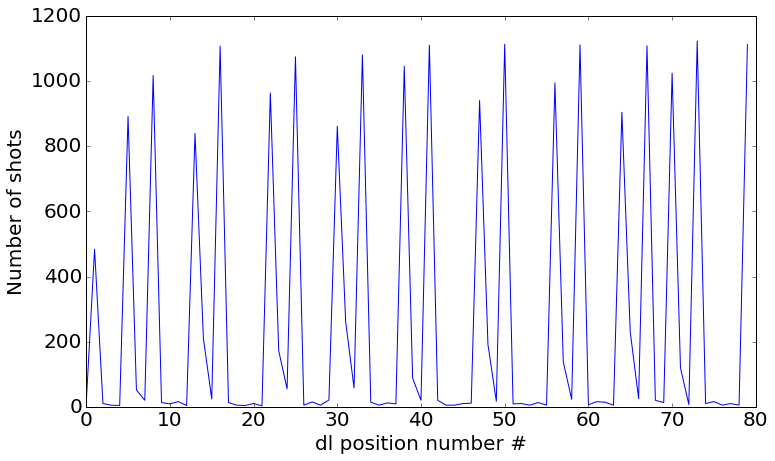

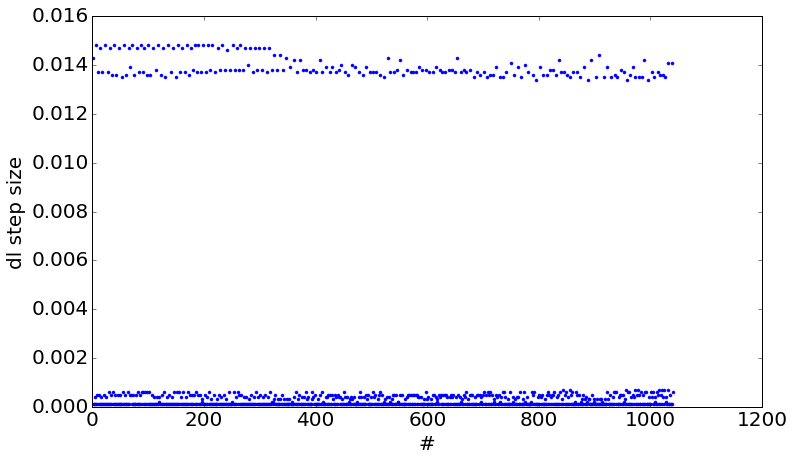

In [14]:
dl_un = np.unique(dl)

shots = []
for t in dl_un[:80]:
    shots.append(np.sum(dl==t))

shots = np.asarray(shots)
plt.figure()
plt.plot(shots)
plt.xlabel('dl position number #')
plt.ylabel('Number of shots')

plt.figure()
plt.plot(np.diff(dl_un), '.')
plt.xlabel('#')
plt.ylabel('dl step size')
plt.show()

#### Lots of dl position acutally have very few shots. They are probably taken while the stage is still moving to it final position. This will have a huge impact on the statistic if the dl position is taken at the time axis (i.e. with no timing tool)

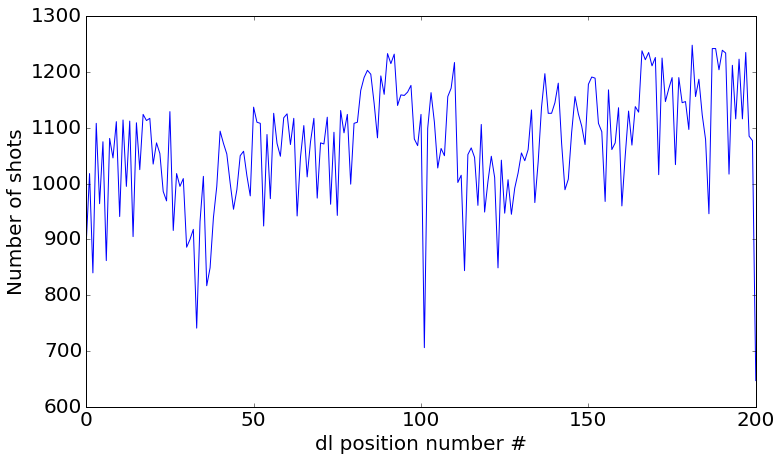

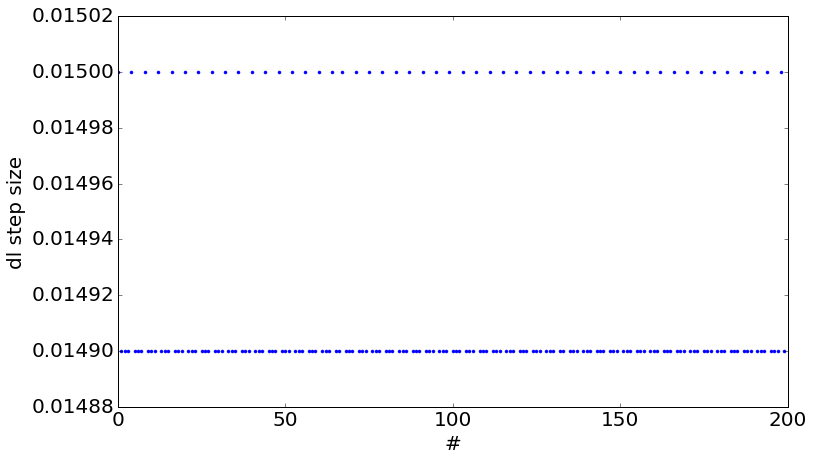

(215434,)

In [15]:
dl_mask = np.zeros(len(dl))
for t in dl_un:
    shots = np.sum(t==dl)
    if shots > 500:
        dl_mask = np.logical_or(dl_mask, (t==dl))
        
dl = dl[dl_mask]
I0 = I0[dl_mask]
I = I[dl_mask]
energy = energy[dl_mask]
energyL3 = energyL3[dl_mask]

dl_un = np.unique(dl)
shots = []
for t in dl_un:
    shots.append(np.sum(dl==t))

shots = np.asarray(shots)
plt.figure()
plt.plot(shots)
plt.xlabel('dl position number #')
plt.ylabel('Number of shots')

plt.figure()
plt.plot(np.diff(dl_un), '.')
plt.xlabel('#')
plt.ylabel('dl step size')
plt.show()
dl.shape

## Plot I/I0 pump - probe

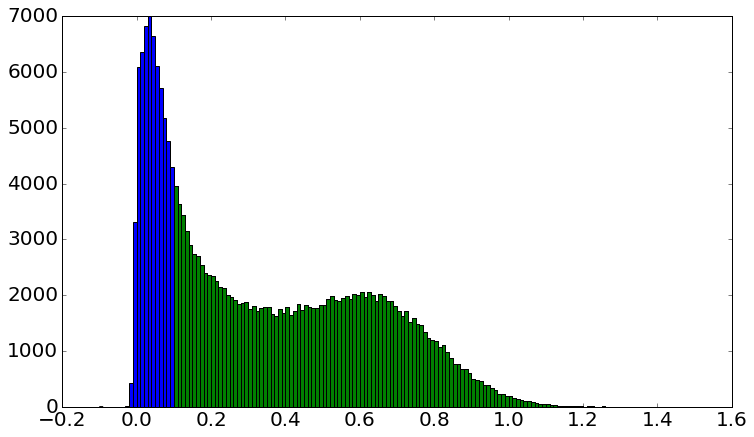

In [16]:
bins=np.arange(-0.1,1.5,0.01)
plt.hist(I0, bins=bins)

I0filt = 0.1
I0mask = I0>I0filt

dl = dl[I0mask]
I0 = I0[I0mask]
I = I[I0mask]
energy = energy[I0mask]
energyL3 = energyL3[I0mask]

plt.hist(I0, bins=bins)
plt.show()

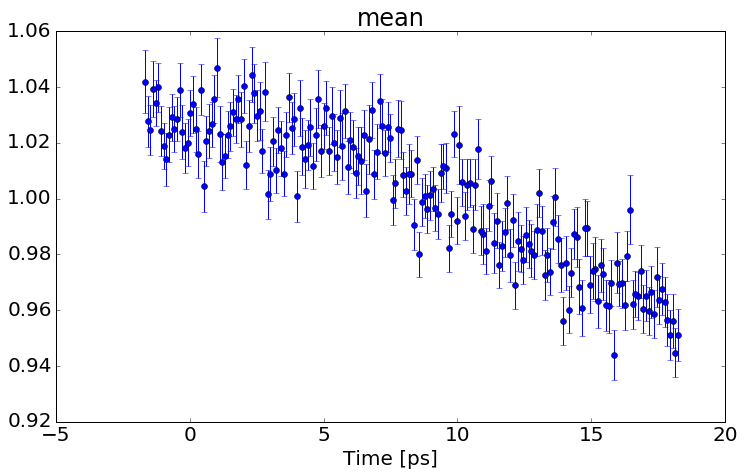

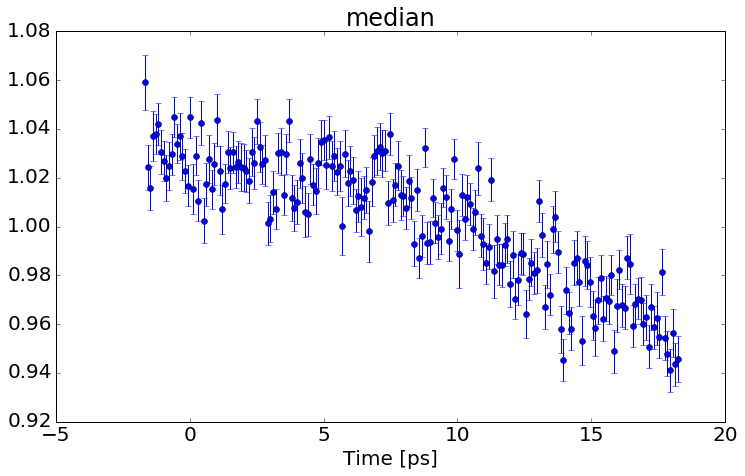

In [17]:
Inorm = I/I0
Iave = []
Ierr = []
for t in np.unique(dl):
    Iave.append(np.mean(Inorm[dl==t]))
    Ierr.append( np.std(Inorm[dl==t]) / np.sqrt(np.sum(Inorm[dl==t])) )

Iave = np.asarray(Iave)
Iave = Iave / np.mean(Iave[(np.unique(dl)<0)])
Ierr = np.asarray(Ierr)
plt.errorbar(-np.unique(dl)/0.15, Iave, Ierr, marker='o', linestyle='None')
plt.xlabel('Time [ps]')
plt.title('mean')

Iave = []
Ierr = []
for t in np.unique(dl):
    Iave.append(np.median(Inorm[dl==t]))
    Ierr.append( np.std(Inorm[dl==t]) / np.sqrt(np.sum(Inorm[dl==t])) )

Iave = np.asarray(Iave)
Iave = Iave / np.mean(Iave[(np.unique(dl)<0)])
Ierr = np.asarray(Ierr)
plt.figure()
plt.errorbar(-np.unique(dl)/0.15, Iave, Ierr, marker='o', linestyle='None')
plt.xlabel('Time [ps]')
plt.title('median')
plt.show()
plt.show()